In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp

In [59]:
data=pd.read_csv("bollywood.csv")

In [60]:
data

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [61]:
#Question 1
data.shape

(149, 10)

In [62]:
data.shape[1]

10

In [63]:
#Question 2
data.shape[0]

149

In [64]:
data["Genre"].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

In [65]:
df=data.Genre.str.strip()

In [66]:
df

0       Romance
1      Thriller
2        Comedy
3         Drama
4        Comedy
         ...   
144      Comedy
145    Thriller
146      Comedy
147      Comedy
148      Action
Name: Genre, Length: 149, dtype: object

In [67]:
df.value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [68]:
#Question 3
data["Genre"].value_counts().nlargest(1)

Comedy    36
Name: Genre, dtype: int64

In [69]:
#Question 4
pd.crosstab(data["Genre"].str.strip(),data["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [70]:
data["Release Date"]=pd.to_datetime(data["Release Date"])

In [71]:
data["Release Date"]

0     2014-04-18
1     2013-01-04
2     2014-07-18
3     2013-01-04
4     2014-07-04
         ...    
144   2015-02-27
145   2015-03-13
146   2015-03-20
147   2015-03-20
148   2014-05-23
Name: Release Date, Length: 149, dtype: datetime64[ns]

In [72]:
df["month"]=data["Release Date"].dt.month

In [73]:
df["month"]

0      4
1      1
2      7
3      1
4      7
      ..
144    2
145    3
146    3
147    3
148    5
Name: Release Date, Length: 149, dtype: int64

In [74]:
df["month"].value_counts()

1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: Release Date, dtype: int64

In [75]:
#Question 5
df["month"].value_counts().nlargest(1)

1    20
Name: Release Date, dtype: int64

In [76]:
#Question 6
data['Release Date']=pd.to_datetime(data['Release Date'])
data['month'] = data['Release Date'].dt.month
data['month'][data['Budget'] >=25].value_counts().nlargest(1)

2    9
Name: month, dtype: int64

In [77]:
#Question 7
data['ROI'] = (data['BoxOfficeCollection']- data['Budget'])/data['Budget']
da = data.nlargest(10, ['ROI'])
da[['MovieName', 'ROI']].value_counts().nlargest(10)

MovieName                  ROI     
Aashiqui 2                 8.166667    1
Bhaag Milkha Bhaag         4.466667    1
Chennai Express            4.266667    1
Fukrey                     6.240000    1
Grand Masti                7.514286    1
Humpty Sharma Ki Dulhania  5.500000    1
Mary Kom                   5.933333    1
PK                         7.647059    1
Shahid                     5.666667    1
The Lunchbox               7.500000    1
dtype: int64

In [78]:
#Question 8
lis=data['ReleaseTime'].unique()
for i in lis:
    print(i+"\n")
    print(data.loc[data['ReleaseTime']==i].ROI.mean())
    

LW

1.1272053098737973
N

0.6577216305350877
HS

0.8508667840873724
FS

0.9738532013595953


In [83]:
#Question 9
corr = data['BoxOfficeCollection'].corr(data['YoutubeLikes'])
print(corr)

0.6825165877731297


In [84]:
data['Release Date']=pd.to_datetime(data['Release Date'])
data['year'] = data['Release Date'].dt.year
data['year']
data

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,ROI,year
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889,2014
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000,2013
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000,2014
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000,2013
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2,1.000000,2015
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,3,1.469231,2015
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3,-0.625000,2015
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3,1.378000,2015


In [86]:
#Question 10
lis=data['Genre'].unique()
for i in lis:
    print(i+" \n ")
    df=data.loc[data['Genre']==i].YoutubeLikes.mean()
    print(df.max())

Romance 
 


AttributeError: 'float' object has no attribute 'max'

[Text(0.5, 1.0, 'Youtube Likes vs Genre')]

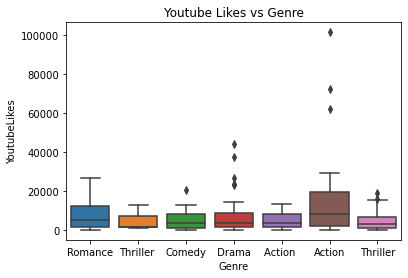

In [87]:
sns.boxplot(x=data.Genre,y=data.YoutubeLikes).set(title='Youtube Likes vs Genre')

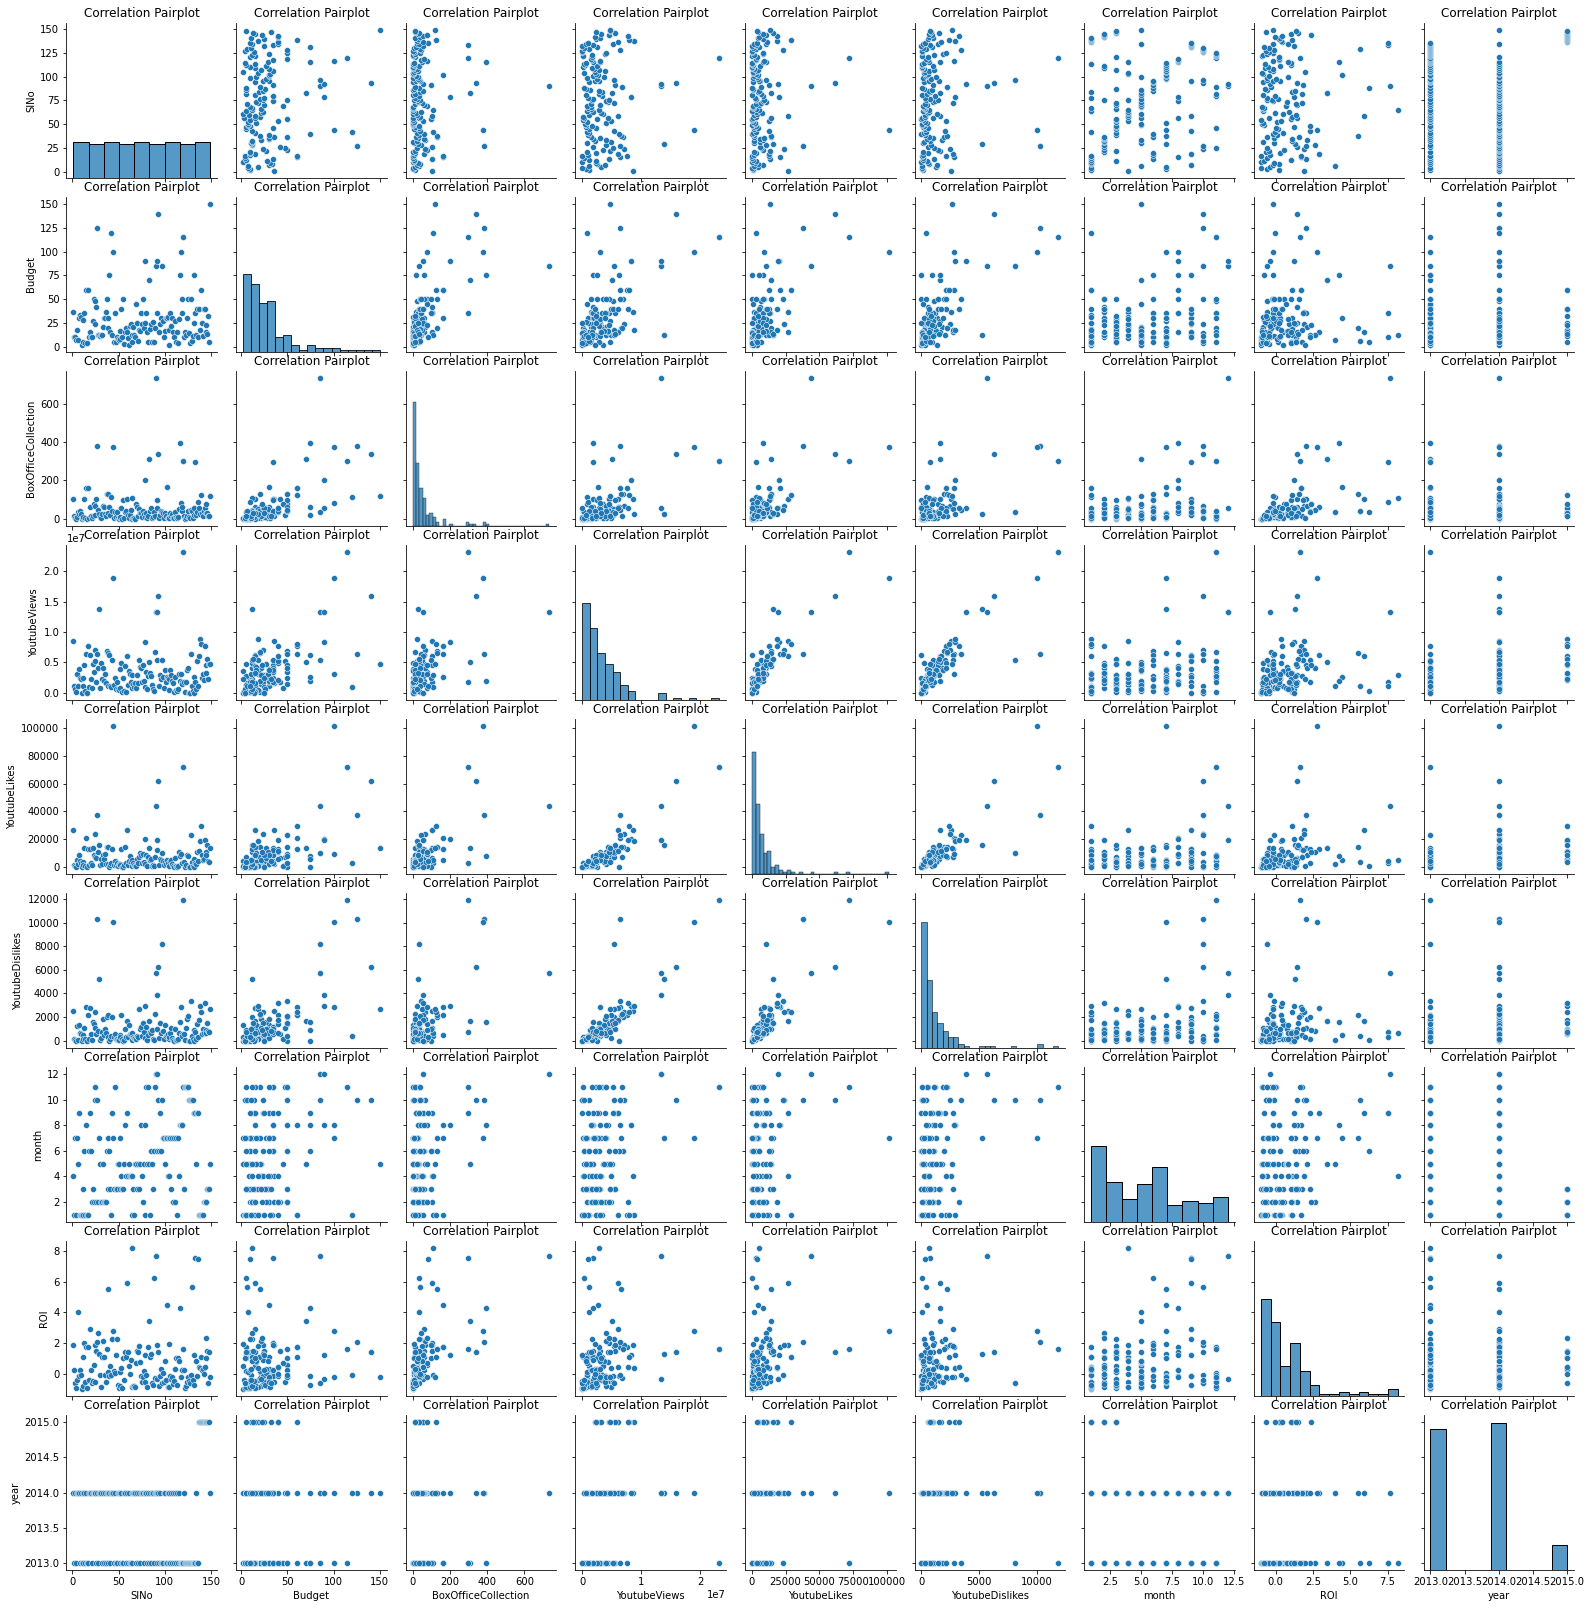

In [88]:
#Question 11
sns.pairplot(data).set(title='Correlation Pairplot')

In [89]:
data.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,ROI,year
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949,0.219954,0.037314,0.132755
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343,0.258457,0.072050,0.062069
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941,0.280943,0.585042,0.011673
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739,0.289593,0.252847,0.280666
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730,0.267112,0.291302,0.209155
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000,0.353301,0.201533,0.147098
month,0.219954,0.258457,0.280943,0.289593,0.267112,0.353301,1.000000,0.205995,-0.214886
ROI,0.037314,0.072050,0.585042,0.252847,0.291302,0.201533,0.205995,1.000000,-0.081778
year,0.132755,0.062069,0.011673,0.280666,0.209155,0.147098,-0.214886,-0.081778,1.000000


[Text(0.5, 1.0, 'Correlation Heatmap')]

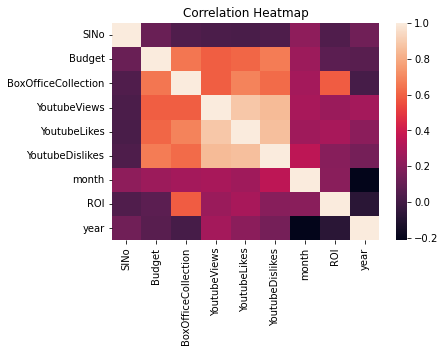

In [90]:
sns.heatmap(data.corr()).set(title='Correlation Heatmap')

In [91]:
#Question 12
lis=data['Genre'].unique()
for i in lis:
    print(i+" \n ")
    df1=data.loc[data['Genre']==i].BoxOfficeCollection.mean()
    print(df1)
   

Romance 
 
52.84120000000001
Thriller  
 
59.21666666666667
Comedy 
 
46.115
 Drama  
 
65.79314285714287
Action  
 
7.366666666666667
Action 
 
103.72571428571428
Thriller 
 
24.32692307692308


[Text(0.5, 1.0, 'Genre vs BoxOfficeCollection')]

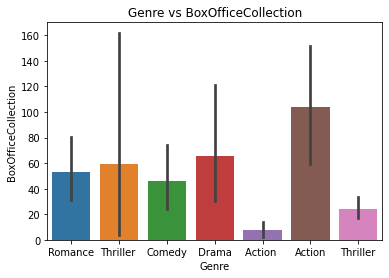

In [92]:
sns.barplot(x=data.Genre,y=data.BoxOfficeCollection).set(title='Genre vs BoxOfficeCollection')

[Text(0.5, 1.0, 'Genre vs BoxOfficeCollection')]

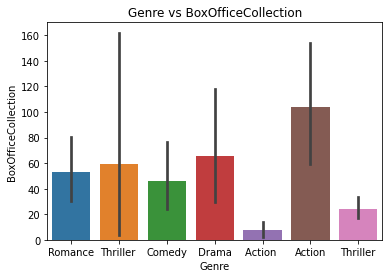

In [93]:
#Question 13
sns.barplot(x=data.Genre,y=data.BoxOfficeCollection).set(title='Genre vs BoxOfficeCollection')

[Text(0.5, 1.0, 'Budget vs Genre')]

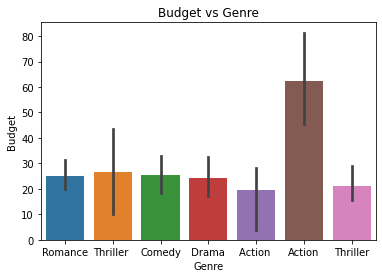

In [94]:
sns.barplot(x=data.Genre,y=data.Budget).set(title='Budget vs Genre')

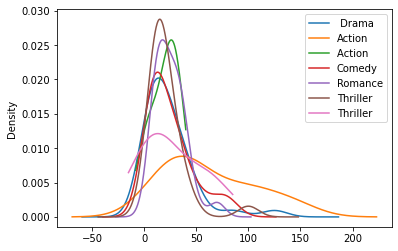

In [95]:
#Question 14
import matplotlib.pyplot as plt
data.groupby('Genre').Budget.plot(kind='density')
plt.legend()

[Text(0.5, 1.0, 'No Of Releases vs Release Date')]

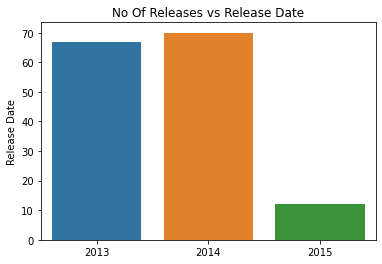

In [96]:
#Question 15

data['Release Date']=pd.to_datetime(data['Release Date'])
df1=pd.DataFrame(data['Release Date'].dt.year.value_counts())
sns.barplot(x=df1.index,y=df1['Release Date']).set(title='No Of Releases vs Release Date')

